# [Adult Income](https://bit.ly/2PKU7u9)

### Celem jest zastosowanie zdobytej wiedzy do rozwiązania problemu, który już jest znany.

Zbiór treningowy jest w `../input/train.adult.h5`.

Twoim zadaniem jest ulepszenie jakości modelu wykorzystując do tego bardziej zaawansowany model, np. lasy losowe (ang. *random forest*).

Ale nie chodzi tylko o to, aby zmienić model, spójrz na to szerzej. Już wiesz, na ile jest ważne dobranie metryki sukcesu. Rozważ, która metryka w tym przypadku jest najbardziej odpowiednia (możesz założyć pewne sensowne rzeczy, bo nie masz możliwości zapytać "biznesu" co dla nich jest ważniejsze).

Miej na uwadze **przeuczenie się** i pamiętaj o pomocnikach w tej walce - krzywa uczenia się, jak również podejście do walidacji.

Postaraj się również zbadać dokładniej cechy. Jak najbardziej polecam użyć ważności cech.
Na koniec pamiętaj o wizualizacji. Dzięki temu możesz znacznie lepiej poznać dane, więc do głowy mogą Ci przyjść lepsze hipotezy.

In [1]:
import helper as h
import pandas as pd

import numpy as np
np.random.seed(0) #ustawienia ziarna dla powtarzalności wyników

from IPython.display import display
import ipywidgets as widgets

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, cross_validate, cross_val_predict
from sklearn.utils import resample
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

import scikitplot as skplt #przydatna biblioteka do wizualizacji

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_hdf('../input/train.adult.h5')
data.head(10)

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,True,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,True,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,True,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,True,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,False,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,False,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,False,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,True,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,False,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,True,5178,0,40,United-States,>50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int8  
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-Num   32561 non-null  int64 
 5   Martial Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  bool  
 10  Capital Gain    32561 non-null  int16 
 11  Capital Loss    32561 non-null  int16 
 12  Hours per week  32561 non-null  int8  
 13  Country         31978 non-null  object
 14  Target          32561 non-null  object
dtypes: bool(1), int16(2), int64(2), int8(2), object(8)
memory usage: 2.9+ MB


In [4]:
features = list(data.columns[:-2])

In [8]:
def get_feats(df, black_list = ['Target', 'Id']):
    num_feats = df.select_dtypes(np.number).columns
    return [x for x in num_feats if x not in black_list]

def get_X_y(df, feats = None):
    if feats is None:
        feats = get_feats(df)
    
    return df[feats].values, df['Target'].values

X, y = get_X_y(data)

In [9]:
cross_val_score(LogisticRegression(solver='lbfgs', multi_class='multinomial'), X, y, cv=3, scoring='accuracy')

array([0.78459554, 0.78339783, 0.78512854])

In [10]:
cross_val_score(DecisionTreeClassifier(), X, y, cv=3, scoring='accuracy')

array([0.76349733, 0.76911738, 0.77130747])

In [19]:
cross_val_score(DecisionTreeClassifier(max_depth=5), X, y, cv=3, scoring='accuracy')

array([0.82706836, 0.82983232, 0.83156731])

In [20]:
y_pred = cross_val_predict(DecisionTreeClassifier(max_depth=5), X, y, cv=3)

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

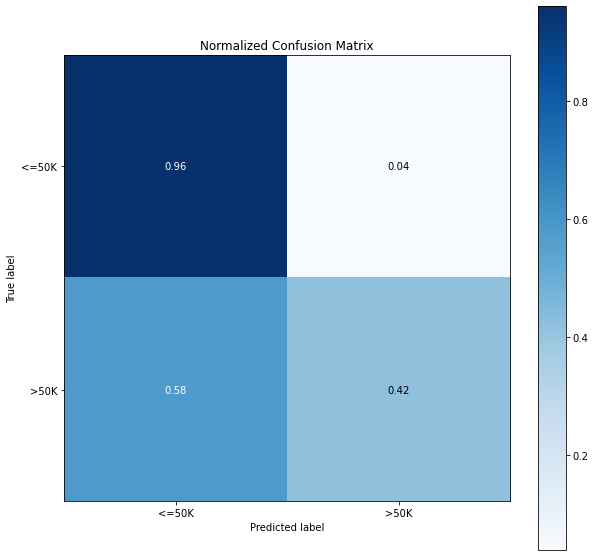

In [21]:
skplt.metrics.plot_confusion_matrix(y, y_pred, normalize=True, figsize=(10, 10))

<AxesSubplot:title={'center':'Feature Importance'}>

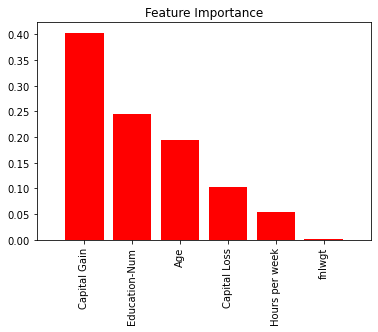

In [27]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X, y)

feats = get_feats(data)
skplt.estimators.plot_feature_importances(model, feature_names=feats, x_tick_rotation=90)

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

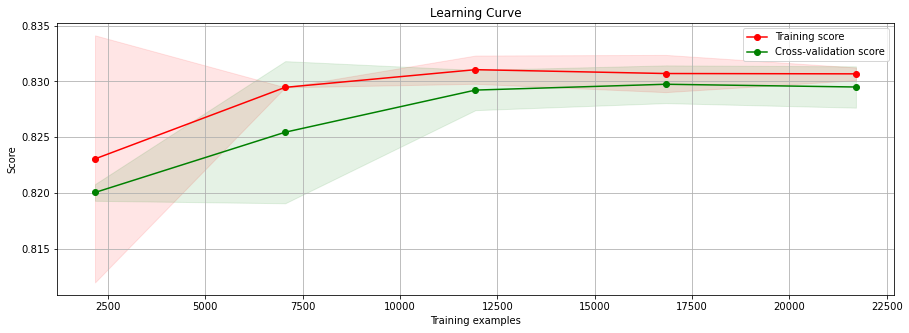

In [30]:
skplt.estimators.plot_learning_curve(model, X, y, figsize=(15, 5), cv=3, scoring='accuracy')

In [31]:
def run_cv_model(model_cls, model_params, X, y, feats, cv=3, scoring='accuracy', plot_learning_curve=True, plot_confusion_matrix=True, plot_feature_importances=True):

    scores = cross_val_score(model_cls(**model_params), X, y, cv=cv, scoring=scoring)
    print('mean={}, std={}, scores={}'.format( np.round(np.mean(scores), 2), np.round(np.std(scores), 2), scores))
    
    model = None
    if plot_learning_curve:
        model = model_cls(**model_params)
        model.fit(X, y)
        title='Learning Curve. {0}: {1}'.format(model_cls.__name__, model_params)
        skplt.estimators.plot_learning_curve(model, X, y, title=title,figsize=(15, 5), cv=cv, scoring=scoring);
    
    if plot_confusion_matrix:
        y_pred = cross_val_predict(model_cls(**model_params), X, y, cv=cv)
        title='Confusion Matrix. {0}: {1}'.format(model_cls.__name__, model_params)
        skplt.metrics.plot_confusion_matrix(y, y_pred, title=title, normalize=True, figsize=(10 ,10))
    
    if plot_feature_importances:
        if model is None:
            model = model_cls(**model_params)
            model.fit(X, y)
        title='Feature Importance. {0}: {1}'.format(model_cls.__name__, model_params)
        skplt.estimators.plot_feature_importances(model, feature_names=feats, title=title, x_tick_rotation=90, figsize=(15, 5));    

mean=0.83, std=0.0, scores=[0.828911   0.83066151 0.83322584]


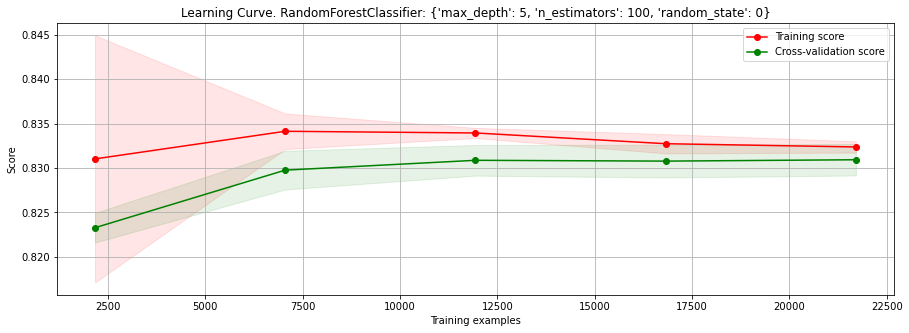

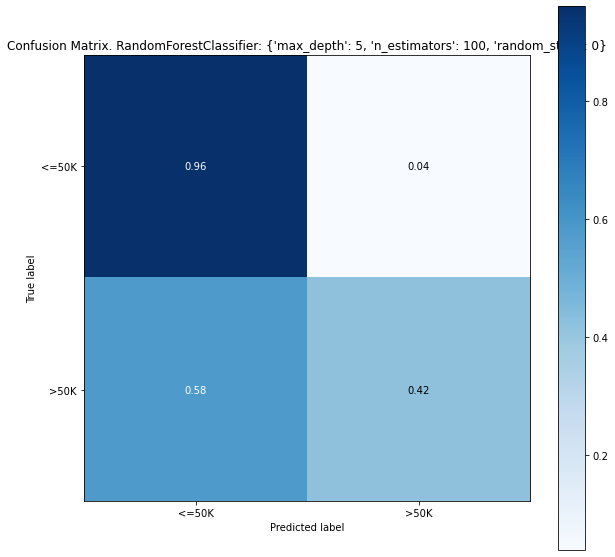

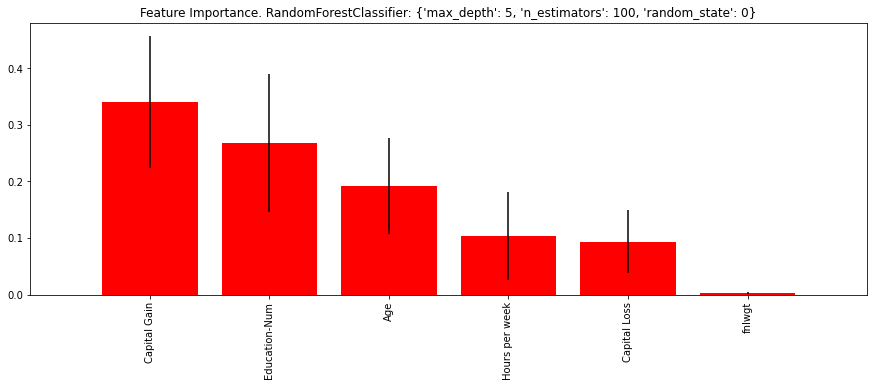

In [33]:
run_cv_model(RandomForestClassifier, {'max_depth':5, 'n_estimators': 100, 'random_state': 0}, X, y, feats)

[17:26:28] WARNING: /workspace/src/learner.cc:480: 
Parameters: { col_sample_by_tree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:26:29] WARNING: /workspace/src/learner.cc:480: 
Parameters: { col_sample_by_tree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:26:30] WARNING: /workspace/src/learner.cc:480: 
Parameters: { col_sample_by_tree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please ope

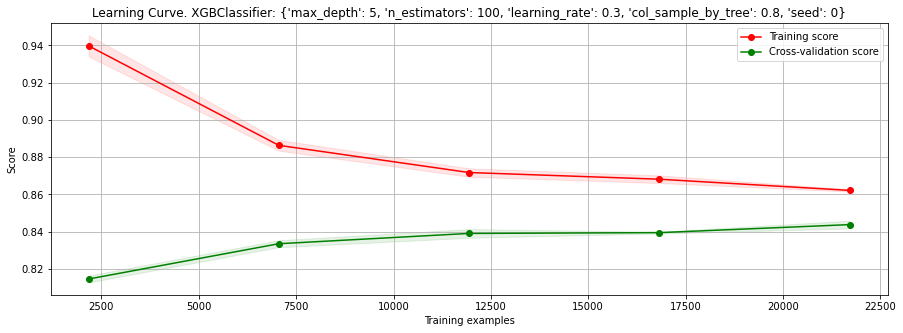

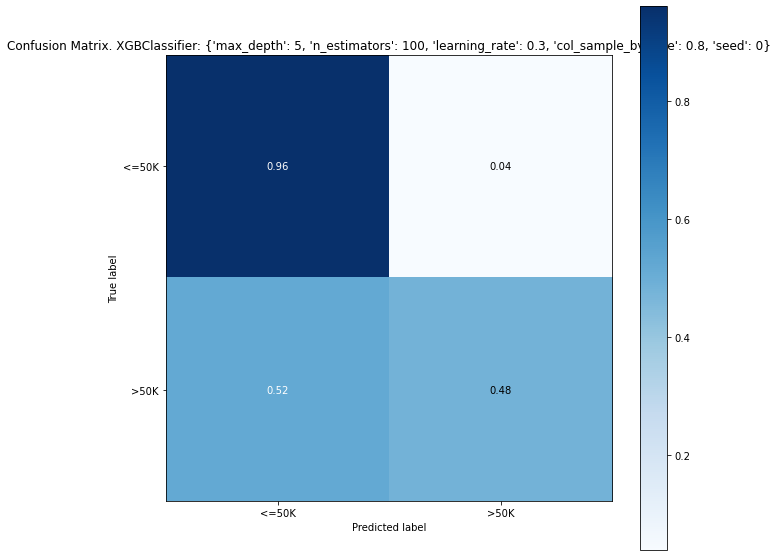

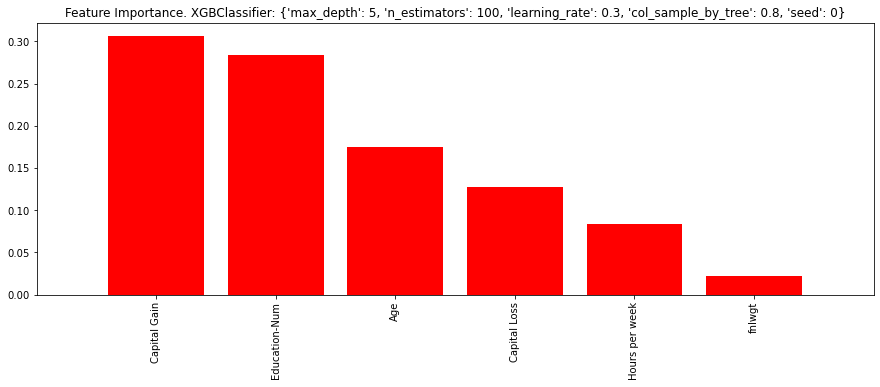

In [35]:
import xgboost as xgb

feats = get_feats(data, ['Target'])
X = data[feats].values
y = data['Target'].values

run_cv_model(xgb.XGBClassifier, {'max_depth':5, 'n_estimators': 100, 'learning_rate': 0.3, 'col_sample_by_tree': 0.8, 'seed': 0,}, X, y, feats)